In [32]:
import numpy as np
import pylab as plt

En el toolbox estudiaste el ejemplo de intentar analizar datos y realizar intervalos de confianza para una muestra particular de datos. Continuemos con el ejemplo de las horas de TV que ve una persona. Por simplicidad, simulemos los datos, suponiendo que son el resultado de una encuesta hecha a mil personas. Para eso usaremos una distribución normal con valor medio $\mu$ y desvío estándar $\sigma$

In [48]:
mu, sigma = 4, 1
n = 1000

datos = np.random.normal(mu, sigma, n)

Hagamos un [histograma](https://es.wikipedia.org/wiki/Histograma)

Text(0, 0.5, 'cantidad de personas')

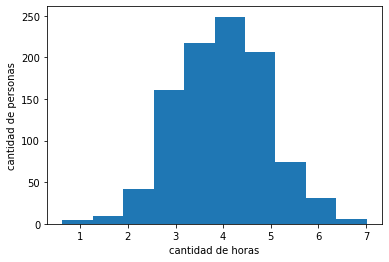

In [49]:
plt.hist(datos)
plt.xlabel('cantidad de horas')
plt.ylabel('cantidad de personas')

Y ahora calculemos el promedio de los datos medidos. La idea es generar un intervalo de confianza, para poder decidir si el $\mu_{muestra}$ se parece al de la distribución original, que valía $\mu =4$  

In [50]:
mu_muestra=np.mean(datos)
sigma_muestra=np.std(datos)
print(mu_muestra)
print(sigma_muestra)

3.983048408245153
0.9502588550931197


Ahora generemos el intervalo de confianza.  Primero hay que elegir $\alpha$, el error que estamos dispuestas/os a cometer. En este caso tomaremos $\alpha=0.05$, que implica que toleraremos hasta un 5% de error.

Una vez establecido alpha, podemos armar el intervalo de confianza para saber con un 95% un intervalo donde se encuentra el promedio $\mu$ de toda la población, usando una submuestra de esta. Para el caso de una gaussiana, se hace aplicando la fórmula.

$\mu_{poblacion}$ está en el intervalo $(\mu_{datos}-z_{\alpha} {{\sigma}\over{ \sqrt{n}}},\mu_{datos}+z_{\alpha} {{\sigma}\over{ \sqrt{n}}})$, donde $ n$ es el tamaño de la población y  $z_{\alpha}$ es el "valor crítico de la distribución" y depende únicamente del **tipo** de distribución que tenemos y de $\alpha$. Para distribuciones normales está tabulado, [acá](
https://www.superprof.es/diccionario/matematicas/estadistica/valores-criticos.html) tienen algunos ejemplos. En este caso si $\alpha=0.05$, corresponde $z_{aplha}=1.96$.




In [51]:
# 90%
z = 1.645
# 95%
z = 1.96
# 99%
z = 2.565

In [52]:
todos = list()
for z in (1.645, 1.96, 2.565):
    todos.append([
    mu_muestra - z * sigma_muestra / np.sqrt(n),
    mu_muestra + z * sigma_muestra / np.sqrt(n)
    ])

In [53]:
todos

[[3.9336164486067653, 4.03248036788354],
 [3.924150754207925, 4.04194606228238],
 [3.9059706109974544, 4.0601262054928515]]

In [54]:
list(map(lambda x: x[1]-x[0], todos))

[0.09886391927677485, 0.11779530807445537, 0.15415559449539717]

Bueno, ahora ahondemos un poco más en cómo funciona esto. Veamos de qué variables dependen. Para eso generen intervalos de confianza para dos submuestras de la que tenemos. A continuación están definidas las dos submuestras "datos_100" y "datos_500" para que realicen este ejercicio.

¿Cómo son los intervalos de confianza? ¿Variaron? ¿Por qué?

In [55]:
datos_100=datos[0:100]
datos_500=datos[200:700]

(array([ 4., 15., 17., 23., 18., 14.,  5.,  3.,  0.,  1.]),
 array([2.0965126 , 2.58211987, 3.06772715, 3.55333442, 4.0389417 ,
        4.52454897, 5.01015624, 5.49576352, 5.98137079, 6.46697806,
        6.95258534]),
 <BarContainer object of 10 artists>)

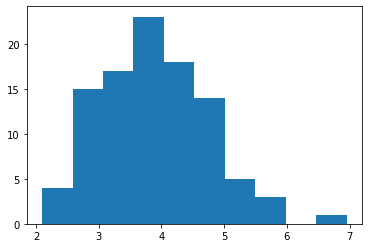

In [56]:
plt.hist(datos_100)

(array([  1.,   2.,  23.,  83., 108., 127.,  98.,  42.,  14.,   2.]),
 array([0.62538776, 1.26443801, 1.90348825, 2.5425385 , 3.18158875,
        3.820639  , 4.45968925, 5.09873949, 5.73778974, 6.37683999,
        7.01589024]),
 <BarContainer object of 10 artists>)

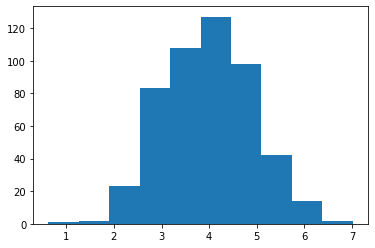

In [57]:
plt.hist(datos_500)

In [61]:
#resuelto
mu_muestra100=np.mean(datos_100)
sigma_muestra100=np.std(datos_100)
z=1.96
n100=len(datos_100)
int_conf=[mu_muestra100-z*sigma_muestra100/np.sqrt(n100),mu_muestra100+z*sigma_muestra100/np.sqrt(n100)]
print(f"{int_conf=}")
print(f"{(int_conf[1] - int_conf[0])}")

int_conf=[3.7360753550674293, 4.079561085950852]
0.3434857308834225


In [62]:
#resuelto
mu_muestra500=np.mean(datos_500)
sigma_muestra500=np.std(datos_500)
z=1.96
n500=len(datos_500)
int_conf=[mu_muestra500-z*sigma_muestra500/np.sqrt(n500),mu_muestra500+z*sigma_muestra500/np.sqrt(n500)]
print(f"{int_conf=}")
print(f"{(int_conf[1] - int_conf[0])}")

int_conf=[3.9059037601834006, 4.068584666873968]
0.16268090669056745


Ahora vamos a aprender a usar el método de Bootstrap, un método alternativo para estimar algún parámetro con su desvío estándar. Es muy útil porque sirve para estimar un parámetro y su error asociado incluso cuando no tenemos idea de cómo es la distribución.

La idea de bootstrap es generar remuestreos a partir de una muestra dada, para cada re-muestra podemos calcular la magnitud de interés, en este caso el promedio $\mu$, que en cada caso será distinto, y luego podemos hacer estadística con eso, por ejemplo calcular el valor medio y desviación estándar de la magnitud de interés. Vendría a ser como generar una "muestra de magnitudes"

A continuación les dejamos una función donde sea hace una remuestra y se calcula el nuevo promedio. Ustedes deben 


1.   Hacer N remuestras (elijan ustedes la cantidad)
2.   Calcular $\mu$ para cada remuestra. Así se generan una distribución de $\mu$
3. Calcular el promedio y la desviación estándar de la distribución de $\mu$ que generaron

¿Cómo generarían un intervalo de confianza a partir de lo que hicieron con bootstrap?



In [64]:
len(datos)

1000

In [88]:
n

1000

In [122]:
def bootstrap_sample(dataset):
    n = len(dataset)
    #indices = list()
    muestra_bootstrap = list()
    for _ in range(n):
        indice = np.random.randint(n)
        #indices.append(indice)
        muestra_bootstrap.append(dataset[indice])
    #indices = np.array(indices)
    return np.array(muestra_bootstrap)

In [124]:
def bootstrap(dataset, B=100):
    boots = list()
    for _ in range(B):
        boots.append(bootstrap_sample(dataset))
    return np.array(boots)

In [132]:
datos_prime = np.random.choice(datos, size=len(datos)*5)

In [133]:
datos_prime.size

5000

In [134]:
unicos, repeticiones = np.unique(datos_prime, return_counts=True)

In [135]:
unicos.size

992

In [115]:
unicos, repeticiones = np.unique(indices, return_counts=True)

In [116]:
repeticiones.argmax()

323

In [117]:
unicos[323]

499

In [140]:
def bootstrap_simplificado(dataset, B=100):
    boots = list()
    for _ in range(B):
        boots.append(np.random.choice(dataset, size=len(dataset)))
    return np.array(boots)

In [141]:
datos_boots = bootstrap_simplificado(datos, 400)

In [145]:
datos_boots.shape

(400, 1000)

(array([  7.,  14.,  54., 172., 216., 257., 173.,  78.,  24.,   5.]),
 array([0.84823724, 1.46500254, 2.08176784, 2.69853314, 3.31529844,
        3.93206374, 4.54882904, 5.16559434, 5.78235964, 6.39912494,
        7.01589024]),
 <BarContainer object of 10 artists>)

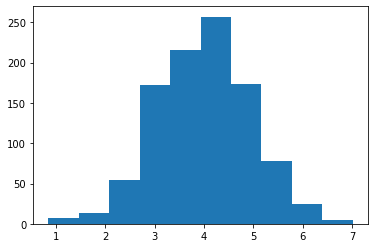

In [146]:
datos_rem = bootstrap_sample(datos)
plt.hist(datos_rem)

In [262]:
alpha = 1

In [263]:
alpha/2

0.5

In [264]:
100 - alpha/2

99.5

### Forma 1

In [214]:
medias = np.apply_along_axis(np.mean, 1, datos_boots)

In [215]:
medias.sort()

In [216]:
inferior = np.percentile(medias, alpha/2)

In [217]:
superior = np.percentile(medias, (100-alpha/2))

In [218]:
intervalo_confianza = [inferior, superior]

In [255]:
intervalo_confianza

[3.9171231901604013, 4.054009919590003]

### Forma 2

In [247]:
media_muestral = np.mean(datos)

In [248]:
medias_centradas = np.apply_along_axis(lambda x: np.mean(x) - media_muestral, 1, datos_boots)

In [249]:
medias_centradas.sort()

In [250]:
inferior = np.percentile(medias_centradas, alpha/2)

In [251]:
superior = np.percentile(medias_centradas, (100-alpha/2))

In [252]:
intervalo_confianza = [media_muestral + inferior, media_muestral + superior]

In [253]:
intervalo_confianza

[3.9171231901604013, 4.054009919590003]